In [24]:
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

from catboost import Pool, cv,CatBoostClassifier

In [25]:
train_df = pd.read_csv('train_df.csv')
test_df = pd.read_csv('test_df.csv')
submission_df = pd.read_csv('sample_submission.csv')

In [26]:
cat_features = ['pickup_date', 'pickup_year', 'pickup_hour',
       'pickup_minute', 'drop_date', 'drop_year', 'drop_hour', 'drop_minute','pick_cluster']
labels = train_df['label'].values
train_df = train_df.drop(['label'], axis=1)

In [27]:
params = {
    'iterations':300,
    'loss_function':'Logloss',
    'random_state':0,
#     'early_stopping_rounds':50,
    'cat_features':cat_features,
    'eval_metric':'F1'
}

In [28]:
train_pool = Pool(data=train_df, label=labels,cat_features=cat_features)
test_pool = Pool(data=test_df, cat_features=cat_features)

In [29]:
model = CatBoostClassifier(**params)

In [30]:
model.fit(train_pool,verbose=10)

Learning rate set to 0.104101
0:	learn: 0.9604477	total: 33.8ms	remaining: 10.1s
10:	learn: 0.9616859	total: 271ms	remaining: 7.12s
20:	learn: 0.9651801	total: 502ms	remaining: 6.67s
30:	learn: 0.9669736	total: 749ms	remaining: 6.5s
40:	learn: 0.9682415	total: 976ms	remaining: 6.16s
50:	learn: 0.9698729	total: 1.21s	remaining: 5.9s
60:	learn: 0.9703952	total: 1.43s	remaining: 5.59s
70:	learn: 0.9713148	total: 1.66s	remaining: 5.34s
80:	learn: 0.9722670	total: 1.87s	remaining: 5.05s
90:	learn: 0.9728789	total: 2.11s	remaining: 4.84s
100:	learn: 0.9736867	total: 2.34s	remaining: 4.61s
110:	learn: 0.9746045	total: 2.58s	remaining: 4.38s
120:	learn: 0.9751919	total: 2.79s	remaining: 4.13s
130:	learn: 0.9757430	total: 3.03s	remaining: 3.91s
140:	learn: 0.9762744	total: 3.26s	remaining: 3.67s
150:	learn: 0.9767708	total: 3.49s	remaining: 3.44s
160:	learn: 0.9771167	total: 3.73s	remaining: 3.22s
170:	learn: 0.9774924	total: 3.96s	remaining: 2.99s
180:	learn: 0.9778696	total: 4.21s	remaining: 

In [31]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,fare,28.814307
1,duration,27.434937
2,meter_waiting_till_pickup,10.508860
3,meter_waiting,8.496590
4,meter_waiting_fare,4.912360
5,drop_hour,3.209154
6,additional_fare,3.139893
7,pickup_hour,3.074153
8,drop_minute,2.339814
9,drop_date,2.335002


In [32]:
for i, column in enumerate(train_df.columns):
    print(i, column)

0 additional_fare
1 duration
2 meter_waiting
3 meter_waiting_fare
4 meter_waiting_till_pickup
5 fare
6 pickup_date
7 pickup_year
8 pickup_hour
9 pickup_minute
10 drop_date
11 drop_year
12 drop_hour
13 drop_minute
14 pick_cluster
15 drop_cluster


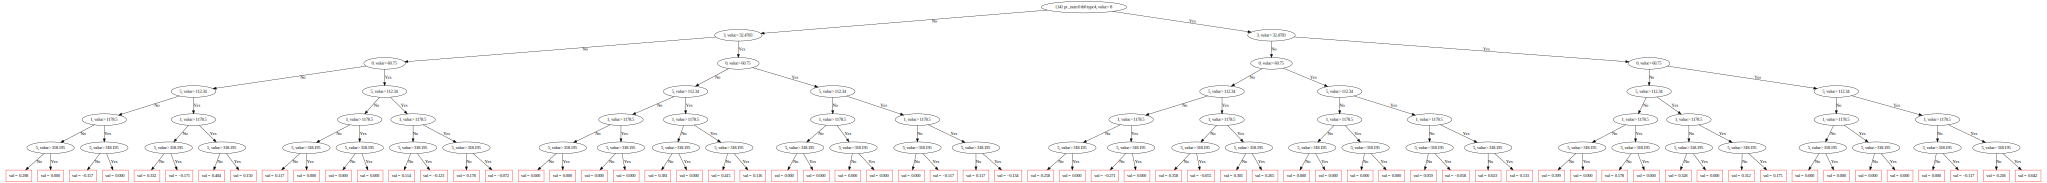

In [33]:
model.plot_tree(tree_idx=0)

In [34]:
prediction = model.predict(test_pool)

In [35]:
submission_df['prediction'] = prediction
submission_df.to_csv('submission.csv',index=False)